In [77]:
library(ggplot2)
library(jsonlite)
library(dplyr)
#Read in the data file
ytdata <- read.csv(file="USvideos.csv", header=TRUE, sep=",")
ytdata <- ytdata[!duplicated(ytdata$video_id), ]
jsonData <- fromJSON("US_category_id.json")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [148]:
# Create dataframe
categorydata <- as.data.frame(as.matrix(jsonData$items))
categorydata <- data.frame(category_id=categorydata$id, category_name=categorydata$snippet.title)

vids <- data.frame(table(category_id=ytdata$category_id))
#vids$Freq <- vids$Freq * 2
#-----------------#
numvids <- merge(categorydata,vids,by="category_id")
numvids <- numvids %>% arrange(Freq)
numvids$num <- seq(1:16)

numvids
#mpg$class = with(mpg, reorder(class, hwy, median))

category_id,category_name,Freq,num
43,Shows,4,1
29,Nonprofits & Activism,14,2
19,Travel & Events,60,3
2,Autos & Vehicles,70,4
20,Gaming,103,5
15,Pets & Animals,138,6
27,Education,250,7
1,Film & Animation,318,8
28,Science & Technology,380,9
17,Sports,451,10


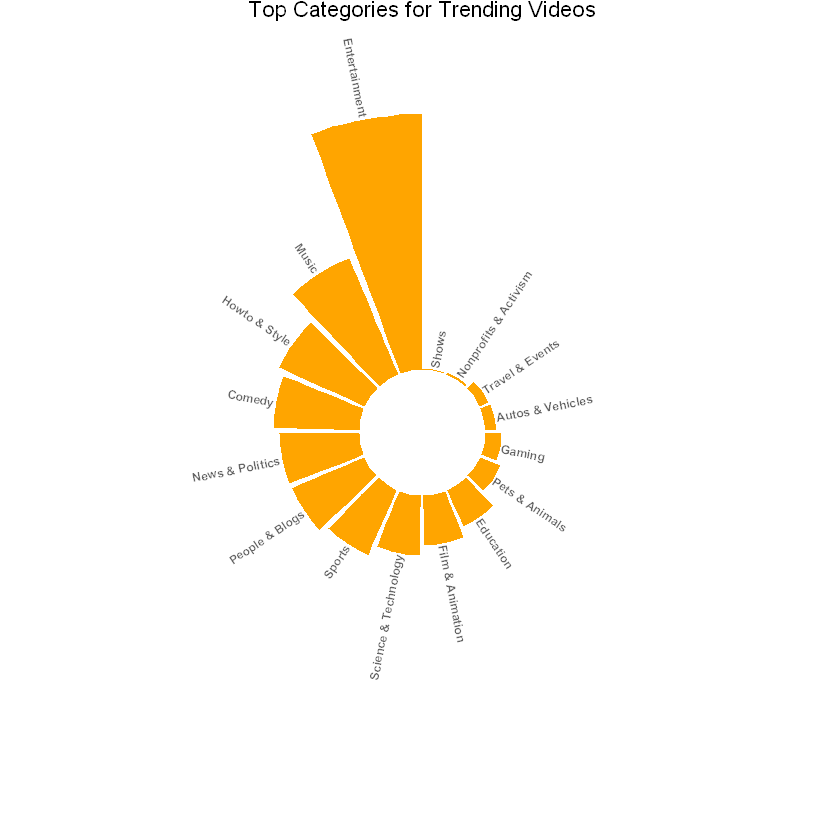

In [151]:
# ----- This section prepare a dataframe for labels ---- #
# Get the name and the y position of each label
label_data <- numvids

# calculate the ANGLE of the labels
number_of_bar <- nrow(label_data)
angle <-  90 - 360 * (as.numeric(label_data$num)-0.5) /number_of_bar

# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
label_data$hjust<-ifelse( angle < -90, 1, 0)
 
# flip angle BY to make them readable
label_data$angle<-ifelse(angle < -90, angle+180, angle)
# ----- ------------------------------------------- ---- #

## Graph based on number of trending videos
bar_graph <- ggplot(numvids, aes(x=num, y=Freq)) +
   geom_bar(stat="identity", fill=alpha("orange"))  +
   ggtitle('Top Categories for Trending Videos') +
   ylim(-400,1650) +
   theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-.02,4), "cm"),     # This remove unnecessary margin around plot
    plot.title = element_text(hjust=0.5)
  ) +
    coord_polar(start = 0) +
  geom_text(data=label_data, aes(x=num, y=Freq+10, label=category_name, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) 
bar_graph